In [204]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [205]:
cd d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


In [206]:
df = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df.drop('kd', axis = 1)
df = df.dropna()

phase_0 = df.loc[df['phase'] == 0, :].copy()
X = phase_0.drop(['fluors', 'phase'], axis = 1).copy()
y = phase_0['fluors'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# standardize the data
scaler = StandardScaler()
#train the scaler on the training data
X_train = scaler.fit_transform(X_train)
#apply the scaler to the test data sets
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [207]:
model = Sequential()
model.add(Dense(units = 200, activation = "relu", input_shape = (4, )))
model.add(Dense(units = 450, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 200, activation = "relu"))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 800, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(1, activation = "relu"))
model.summary()
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['mean_squared_error'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 200)               1000      
                                                                 
 dense_73 (Dense)            (None, 450)               90450     
                                                                 
 dropout_36 (Dropout)        (None, 450)               0         
                                                                 
 dense_74 (Dense)            (None, 200)               90200     
                                                                 
 dense_75 (Dense)            (None, 100)               20100     
                                                                 
 dropout_37 (Dropout)        (None, 100)               0         
                                                                 
 dense_76 (Dense)            (None, 800)             

In [208]:
no_epochs = 13
history = model.fit(X_train, y_train, batch_size = 10, epochs = no_epochs, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)

Epoch 1/13
3008/3008 [==============================] - 15s 5ms/step - loss: 2.5814 - mean_squared_error: 2.5814 - val_loss: 2.2234 - val_mean_squared_error: 2.2234
Epoch 2/13
3008/3008 [==============================] - 13s 4ms/step - loss: 2.0048 - mean_squared_error: 2.0048 - val_loss: 1.7381 - val_mean_squared_error: 1.7381
Epoch 3/13
3008/3008 [==============================] - 14s 5ms/step - loss: 1.8228 - mean_squared_error: 1.8228 - val_loss: 1.7640 - val_mean_squared_error: 1.7640
Epoch 4/13
3008/3008 [==============================] - 14s 5ms/step - loss: 1.7860 - mean_squared_error: 1.7860 - val_loss: 1.8516 - val_mean_squared_error: 1.8516
Epoch 5/13
3008/3008 [==============================] - 14s 5ms/step - loss: 1.7982 - mean_squared_error: 1.7982 - val_loss: 1.5732 - val_mean_squared_error: 1.5732
Epoch 6/13
3008/3008 [==============================] - 14s 5ms/step - loss: 1.7179 - mean_squared_error: 1.7179 - val_loss: 1.5953 - val_mean_squared_error: 1.5953
Epoch 7/13

In [209]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))

940/940 [==============================] - 2s 2ms/step
1.163414868985294
403/403 [==============================] - 1s 2ms/step
1.161375666971567


In [210]:
ls *.h5

 Volume in drive D is Google Drive
 Volume Serial Number is 1983-1116

 Directory of d:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

04/12/2022  17:55         6,710,880 b2e20_1.h5
04/12/2022  22:10        18,127,424 b3e8_3.h5
04/12/2022  19:46         9,120,624 b6e15_2.h5
28/11/2022  16:52         9,737,336 final_model.h5
08/12/2022  15:02         3,457,984 good_model_b3_e11.h5
02/12/2022  15:55        18,798,920 model.h5
               6 File(s)     65,953,168 bytes
               0 Dir(s)  14,594,760,704 bytes free


In [217]:
#model.save('good_model_b10_e13.h5')

In [212]:
#model = keras.models.load_model('model.h5')
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
pred_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_test)))
y_pred = model.predict(X)
print(np.sqrt(mean_squared_error(y, y_pred)))

940/940 [==============================] - 2s 2ms/step
1.163414868985294
403/403 [==============================] - 1s 2ms/step
1.161375666971567
1343/1343 [==============================] - 2s 2ms/step
1.1628034700128922


C:\Users\709583\AppData\Local\Temp\ipykernel_8212\2785355678.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


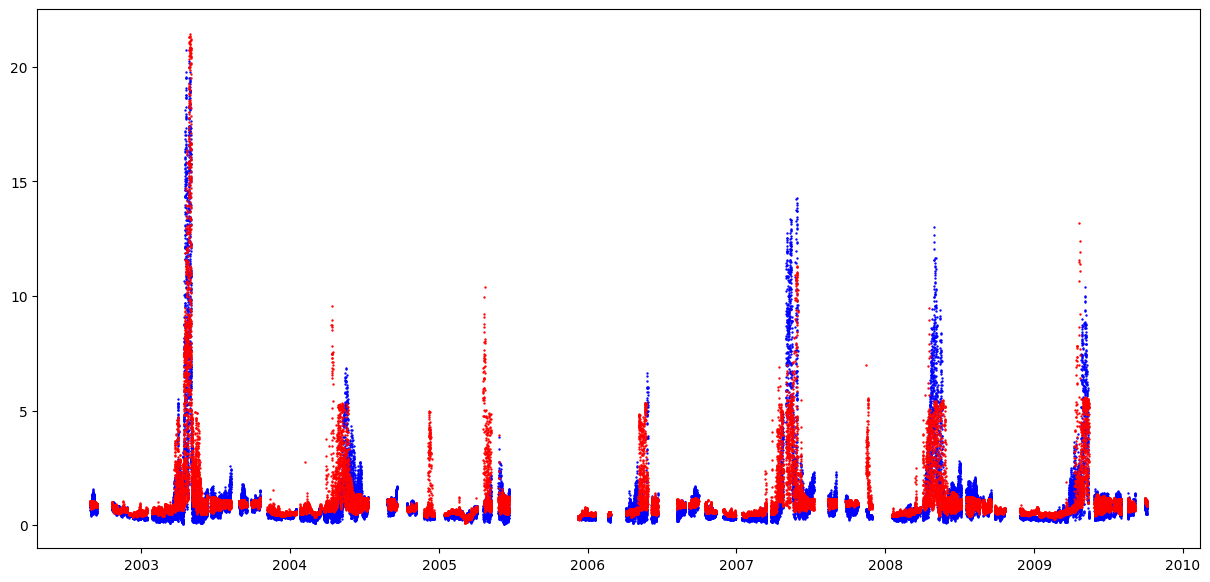

In [213]:
phase_0.loc[:, 'y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_0.index, phase_0['y_pred'], s = 0.5, color = 'red')
#fig.savefig('predictions.png')
fig.show()

phase_0.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_0_predictions.csv', index = 'false', sep = ',')

C:\Users\709583\AppData\Local\Temp\ipykernel_8212\138757343.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


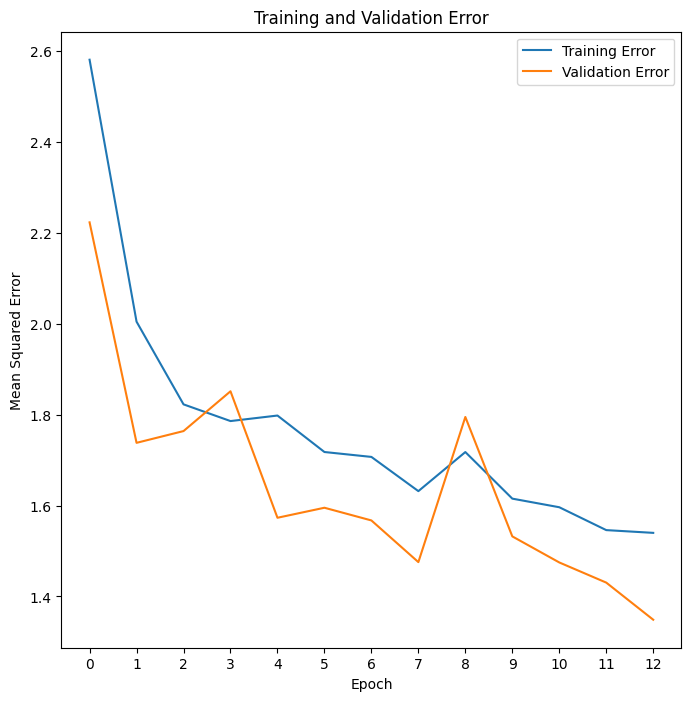

In [214]:
epochs_range = range(no_epochs)
train_err = history.history['mean_squared_error']
validation_err = history.history['val_mean_squared_error']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize = (8,8))
ax.plot(epochs_range, train_err, label = 'Training Error')
ax.plot(epochs_range, validation_err, label = 'Validation Error')
ax.legend(loc = 'upper right')
ax.set_xticks(np.arange(0, no_epochs, 1))
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Training and Validation Error')
fig.show()

In [215]:
phase_1 = df.loc[df['phase'] > 0, :].copy()
X_1 = phase_1.drop(['fluors', 'phase'], axis = 1).copy()
y_1 = phase_1.loc[:, 'fluors'].copy()
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
y_1_pred = model.predict(X_1)
print(np.sqrt(mean_squared_error(y_1, y_1_pred)))
#phase_1.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_1_predictions.csv', index = 'false', sep = ',')

1904/1904 [==============================] - 5s 2ms/step
1.6931197488110727


C:\Users\709583\AppData\Local\Temp\ipykernel_8212\2978685884.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


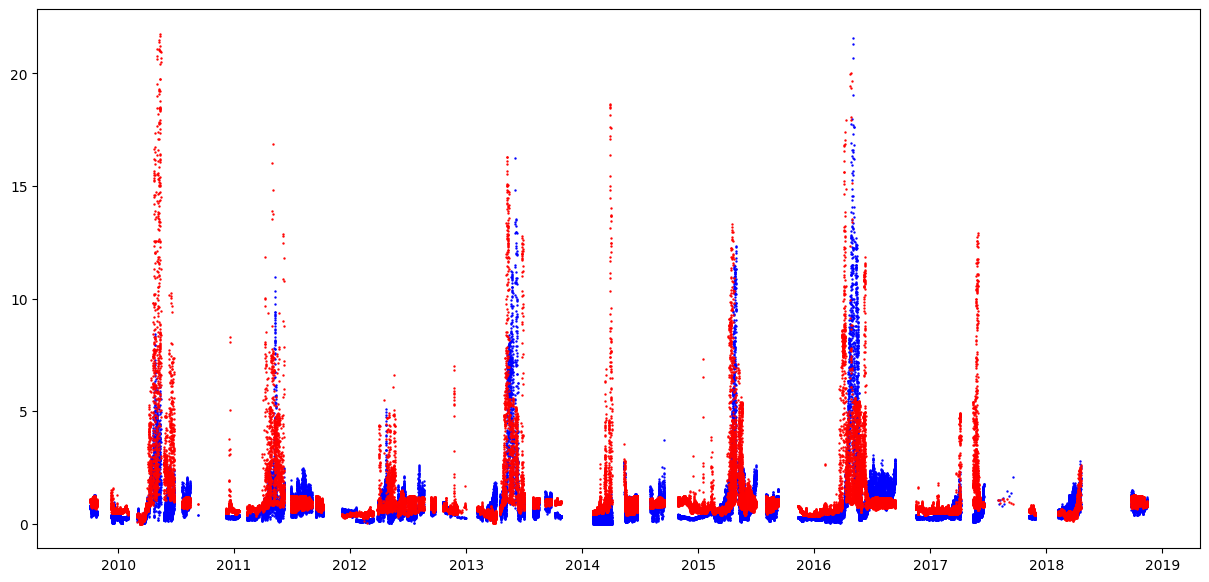

In [216]:
phase_1['y_1_pred'] = y_1_pred
fig, ax = plt.subplots(figsize = (15, 7))
ax.scatter(phase_1.index, phase_1['fluors'], s = 0.5, color = 'blue')
ax.scatter(phase_1.index, phase_1['y_1_pred'], s = 0.5, color = 'red')
#fig.savefig('future_predictions.png')
fig.show()